# Real Estate Price Prediction

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
#setting the figure size
matplotlib.rcParams['figure.figsize']=(20,10)

In [3]:
#importing the dataset
df1 = pd.read_csv('C:/Users/Acer/Desktop/Prashant/CSV Files/Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
#checking shape of datasets
df1.shape

(13320, 9)

In [5]:
#check the data types of features
df1.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

to know the type of area in the dataset, need to use *groupby* to understand the data properly.

`groupby('area_type')` groups the data for *area_type* . And `['area_type'].agg('count')` provides the details of content in *area_type* and *'count'* gives details about how many times the type is repeated in the filtered datasets.

In [6]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

It can be seen that there are **four** type of area in the datasets. 

The main objective is to decide the price of houses. So, *availability* , *society*, *balcony*, *area_type* are not co-related to the pricing of the house.

In [7]:
df2 = df1.drop(['availability', 'society', 'balcony', 'area_type'], axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Data Cleaning

1st priority is to check the **na** values in the datasets.

In [8]:
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

**isna** describes the *na* values in the dataset. And **sum()** describes the sum of *na* values in the dataset.

So, *location* has 1 *na* value, *size* has 16 *na* values, *bath* has 73 *na* values.

As our datasets has 13320 rows, & *na* values are less than 0.5% of the datasets, it can be considered as negligible & hence it can be dropped to study model

In [9]:
df3 = df2.dropna()
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

So, from above, it can be seen that our dataset now has *ZERO* na values

In [10]:
df3.shape

(13246, 5)

In [11]:
df3.groupby('size')['size'].agg('count')

size
1 BHK          531
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5198
2 Bedroom      329
27 BHK           1
3 BHK         4286
3 Bedroom      546
4 BHK          577
4 Bedroom      818
43 Bedroom       1
5 BHK           57
5 Bedroom      296
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

from above it can be seen that the there are many different sizes of rooms stored in different ways. So, it needs to simplified. Above can be achieved alternatively by below code too:

In [12]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

We need to arrange the data in proper way. So, we need to create another column which would transfer the data from original column

In [13]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-13-4c4c73fbe7f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [14]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df3.groupby('bhk')['bhk'].agg('count')

bhk
1      649
2     5527
3     4832
4     1395
5      353
6      221
7      100
8       89
9       54
10      14
11       4
12       1
13       1
14       1
16       1
18       1
19       1
27       1
43       1
Name: bhk, dtype: int64

As can be seen from above, there are houses with more than 20 rooms!

In [16]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

As can be seen, there is a range of **1133 - 1384** . So we need to convert this range to int values.<br>
Also, as seen before, ***total_sqft*** datatype is *object*. So need to convert the datatype to *numerical form*

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


From above, it can be understood that the total_sqft contains many unstructured datas. So, we need to figure these unstructed values in order to inco-operate it in the model

In [20]:
def convert_range_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
convert_range_to_num('2112')

2112.0

In [22]:
convert_range_to_num('1015-1540')

1277.5

In [23]:
convert_range_to_num('34.45Sq.Meter')

from the above, it can be considered that the function *convert_range_to_num(x)* is working properly. It is able to convert the range to numbers

In [24]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_range_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [25]:
df4.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

## Feature Engineering

In [26]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [27]:
df5.groupby('location')['location'].agg('count')>5

location
 Anekal                 False
 Banaswadi              False
 Basavangudi            False
 Bhoganhalli            False
 Devarabeesana Halli     True
                        ...  
t.c palya               False
tc.palya                False
vinayakanagar           False
white field,kadugodi    False
whitefiled              False
Name: location, Length: 1304, dtype: bool

There are 1304 locations!! which is too many to use OneHotEncoder. SO, need to simplify the data further

In [28]:
df5.location = df5.location.apply(lambda x: x.strip())

location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [29]:
len(location_stats[location_stats<=10])

1052

In [30]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [31]:
len(df5.location.unique())

1293

In [32]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [33]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


## Outlier Identification & Removal
Outlier are the data samples which are significantly higher than the normal/average threshold.
This outlier might or might not be correct, but however, they are an anomoly, it is more feasible to remove them

In [34]:
df5[df5.total_sqft/df5.bhk<300].head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,other,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


As can be seen from above, the above are an anomoly, and some of them are incorrect.

In [35]:
df5.shape

(13246, 7)

In [36]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [37]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

As can be seen from above, the minimum value is extremely low, & there is also properties that are extremely high.
So, it is highly recommeded that these model needs to be set around the StandardDeviation, as the model we would be approaching would be a more generic models.

But, the pricing also depends on the location. Some areas might have the higher price bands, while some can be slotted in the lower price bands.

In [38]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
7,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.557522
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
9,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667


In [39]:
df7.shape

(10241, 7)

As can be seen from above, the dataset has now been reduced, and the data present here is according to the conditions we had applied. So, the anomoly of extremities of price per square foot is now removed.<br>
One of the most common way to understand the pricing by location is to plot the data points in scatter plot.

In [40]:
def plot_scatter_plot (df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] == (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color = 'green', marker='+', s = 50)
    plt.xlabel('Total Square Foot Area')
    plt.ylabel('Total Price')
    plt.title('Location')
    plt.legend()

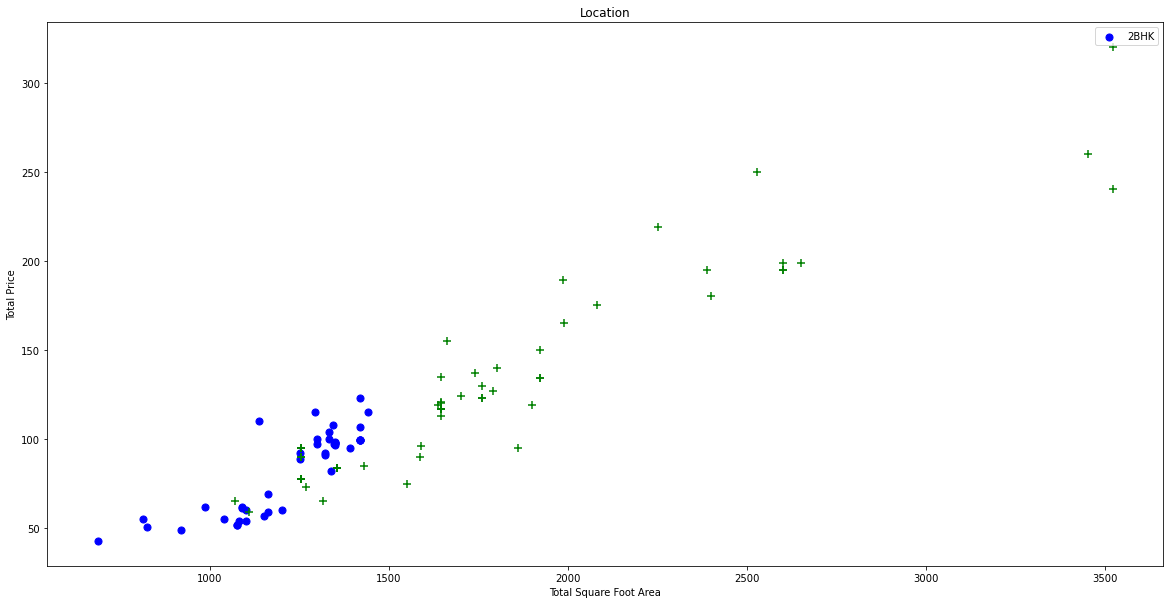

In [41]:
plot_scatter_plot(df7, 'Hebbal')

As can be seen from above, blue points are 2BHK appartments, while green + is a 3BHK appartment. As can be seen, green markers are usually equipped with higher square foot area as compared to their counterparts.<br>
Also the pricing has been generally higher for the green +.<br>
But there are four blue data points have higher price as compared to green points.

**In order to remove these anomolies, where, for the same location, the price of 2BHK is higher than price of 3BHK**.<br>
`{
        '1' : {
            'mean' : 4000,
            'std' : 2000,
            'count' : 34
        },
        '2': {
            'mean': 4300,
            'std': 2300,
            'count': 22
        },
}`<br>


In [42]:
def remove_bhk_outliers (df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

In [43]:
df8 = remove_bhk_outliers(df7)

In [44]:
df8.shape

(7329, 7)

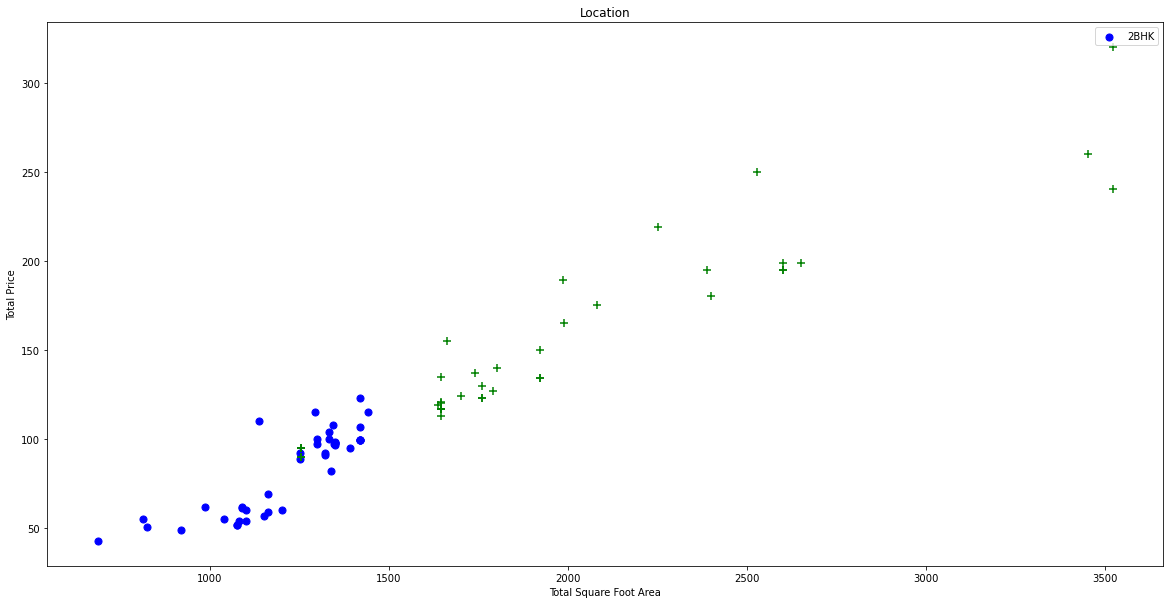

In [45]:
plot_scatter_plot(df8, 'Hebbal')

As compared with *df7* & *df8* plots, the green markers in blue regions have now significantly been reduced.<br>
Also, the size of our data set is also been reduced as compared to *df7*

Text(0.5, 1.0, 'Price Per Square Feet Count')

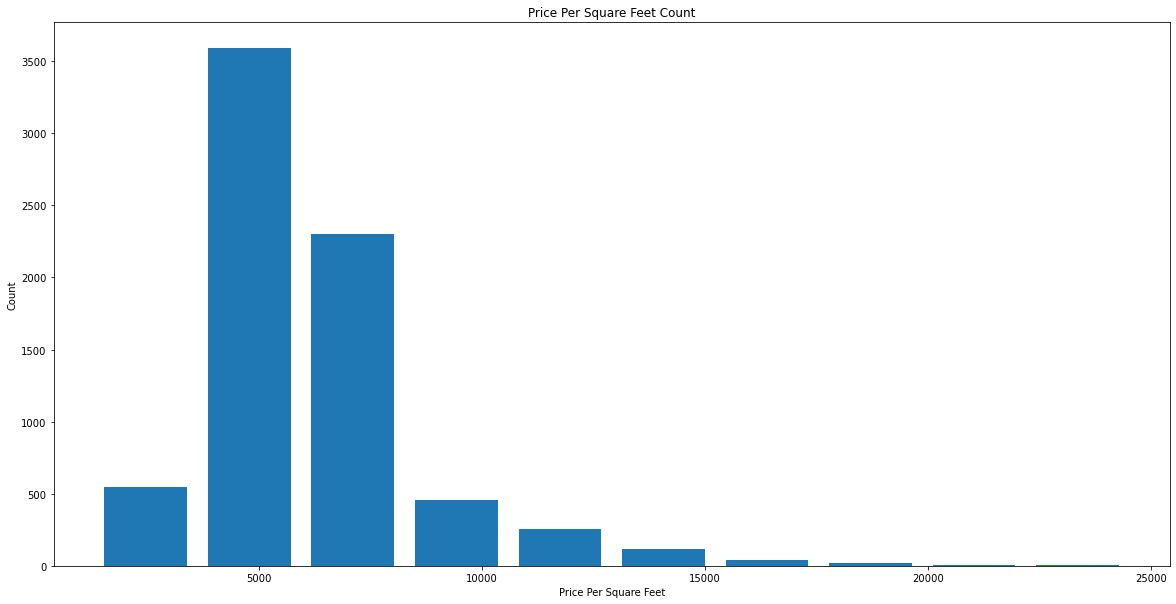

In [46]:
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')
plt.title('Price Per Square Feet Count')

As can be seen from above, the distribution is a **Gaussian Distribution(Normal Distribution)**. There are the many appartments with Price per sqft of aroud 5000 INR.

One another factor that could be an anomoly is the ***number of bathrooms in an appartment***.

In [47]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [48]:
df8[(df8.bath>10)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


As can be seen, there are usually one bathrooms for each rooms. But still, to get rid of the improper data, we would consider that there should not be more than **number of rooms + 2**. *(eg. for 5BHK, bathrooms<= 7)*

Text(0, 0.5, 'Count')

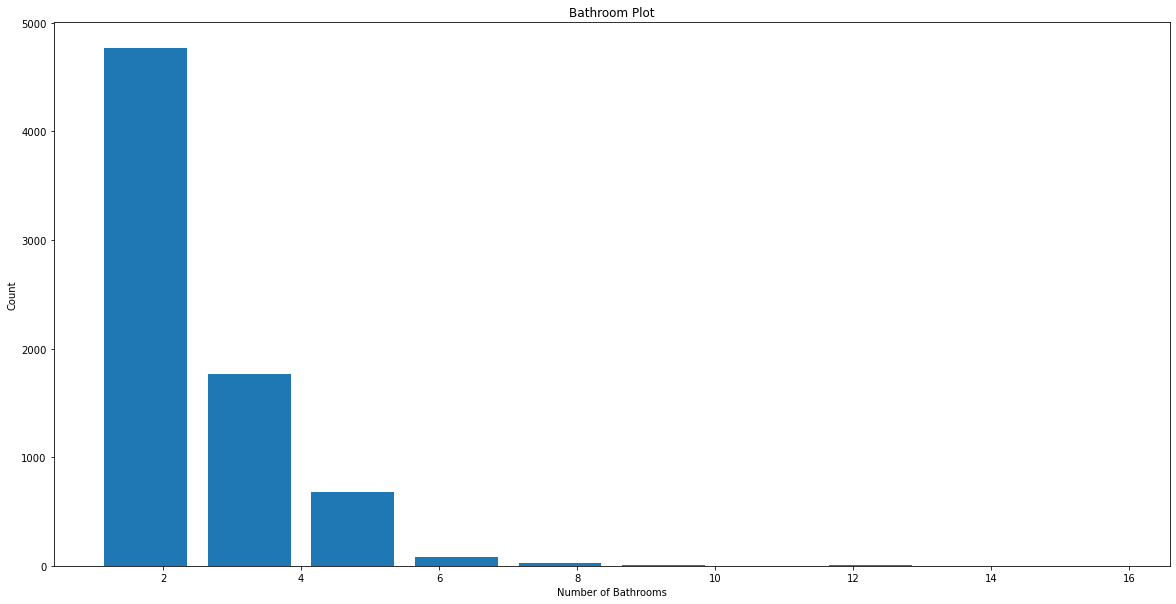

In [49]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel('Number of Bathrooms')
plt.title('Bathroom Plot')
plt.ylabel('Count')

In [50]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


So, the above mentioned have more bathrooms than the criteria mentioned. So, it is ideal to remove them.

In [51]:
df9 = df8[df8.bath<df8.bhk+2]
df9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [52]:
df9.shape

(7251, 7)

Now, to make the dataset more ideal for the machine learning model, it would be better if the columns which are irrelevant could be dropped.

In [53]:
df10 = df9.drop(['size', 'price_per_sqft'], axis = 'columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


## PREPARING DATA FOR MODELLING

In [54]:
dummies = pd.get_dummies(df10.location)
dummies = dummies.drop(['other'], axis = 'columns')
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df11 = pd.concat([df10, dummies], axis = 'columns')
df12 = df11.drop(['location'], axis = 'columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df12.shape

(7251, 245)

In [57]:
# ONLY INDEPENDENT DATAFRAMES---
X = df12.drop(['price'], axis = 'columns')

In [58]:
y = df12.price

In [59]:
print(X.shape)
print(y.shape)

(7251, 244)
(7251,)


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 0)

In [61]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.824301862363899

Linear Regression will give the prediction score of **87%**, which is acceptable.<br>
However, to optimize the model, further **K FOLD ANALYSIS** would be better.

In [62]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, train_size = 0.8, random_state = 10)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.84522777, 0.80004632, 0.88682995, 0.842265  , 0.86250633])

However, the score are still very much the same. <br>
So, trying different model might result in better scores.

In [63]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [64]:
def best_algorithm_selection(x,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso_regression': {
            'model' : Lasso(),
            'params' : {
                'alpha': [1,2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree_reg': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
                
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, train_size = 0.8, random_state = 0)
    for algo_name, config in algos.items():
        gs_cv = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score=False)
        gs_cv.fit(X, y)
        scores.append({
            'model': algo_name,
            'params': gs_cv.best_score_,
            'best_params': gs_cv.best_params_
        })
    return pd.DataFrame(scores, columns = ['model', 'params', 'best_params'])

In [65]:
best_algorithm_selection(X, y)

,model,params,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso_regression,0.687437,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree_reg,0.725849,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


As can be seen from above, the **Linear Regression Model* is best model, which would return the best score.

To check the accuray of the model, we would try random testing...

In [66]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >=0:
        x[loc_index] = 1
    
    return lr_clf.predict([x])[0]

In [67]:
predict_price('Vijayanagar', 1000, 2, 4)

57.64631082926202

In [68]:
predict_price('Indira Nagar', 1000, 4, 4)

180.06402418141386

In [69]:
predict_price('Indira Nagar', 1000, 3, 3)

176.44407702927313

From above, it can be concluded that, for the 2BHK house, the price is less than 3BHK, but difference is not that high.

Our model is now ready. We would be saving this model, which can be used for further calculations.

## Saving the Model

In [70]:
import pickle
with open('real_estate_price_prediction_Bengluru.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [71]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))